# Model Evaluation for Strawberry Price Prediction

This notebook evaluates the performance of different time series models.

In [1]:
import pandas as pd
import numpy as np
import joblib

from src.fct_evaluation import *
from src.parameter import get_dict_params

## 1. Load Models and Predictions

In [2]:
# Load parameters
dict_params = get_dict_params()
model_types = dict_params['model_types']

# Load test data
test_ts = joblib.load('models/test_data.joblib')

# Load predictions for each model
predictions = {
    model_type: joblib.load(f'models/{model_type}_predictions.joblib')
    for model_type in model_types
}

## 2. Evaluate Models

In [3]:
# We check that prediction don't have NaN
nan_counts = {model: np.isnan(pred).sum() if isinstance(pred, (np.ndarray, list))
              else pred.isna().sum() if isinstance(pred, pd.Series)
              else 0
              for model, pred in predictions.items()}
nan_counts

{'naive': 0, 'arima': 0, 'xgboost': 0}

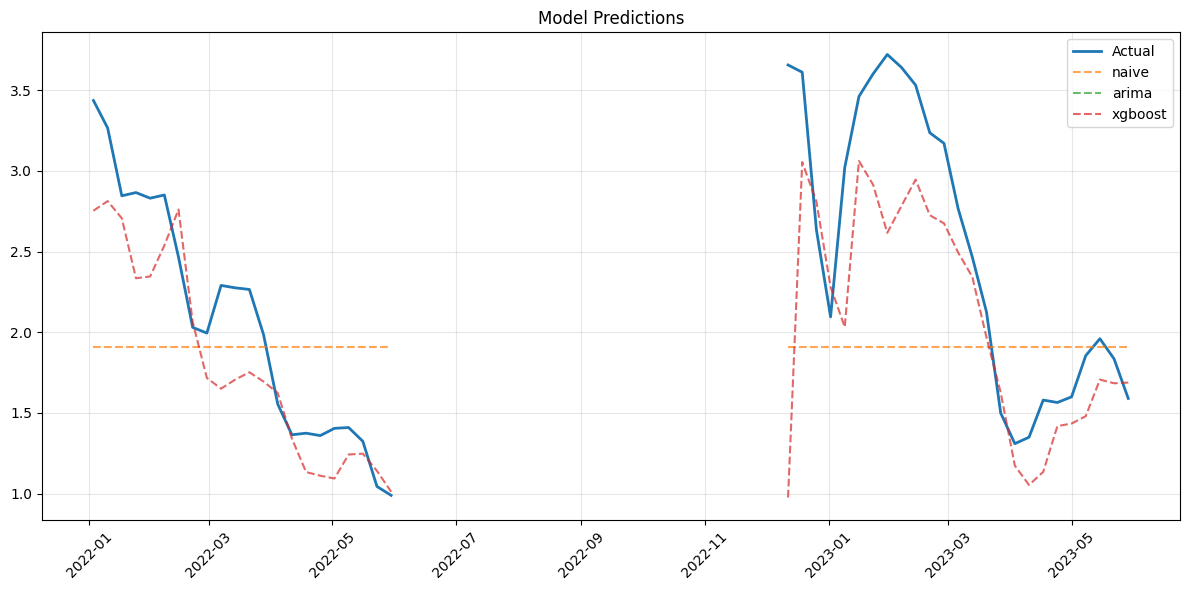

In [4]:
# Plot predictions
plot_predictions(test_ts, predictions)

/home/briacleguillou/.var/app/com.visualstudio.code/cache/pypoetry/virtualenvs/strawberries-price-prediction-RFzSQChC-py3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/briacleguillou/.var/app/com.visualstudio.code/cache/pypoetry/virtualenvs/strawberries-price-prediction-RFzSQChC-py3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


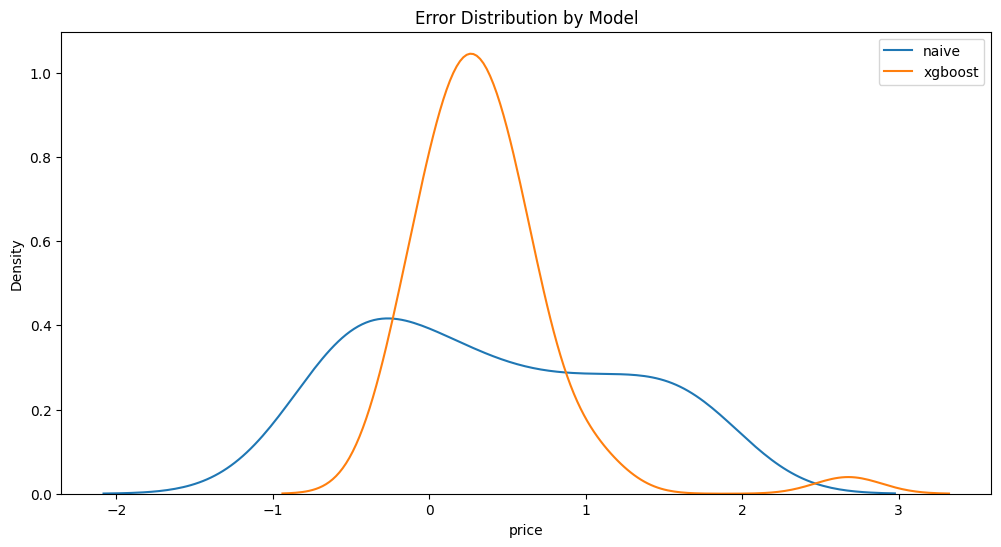

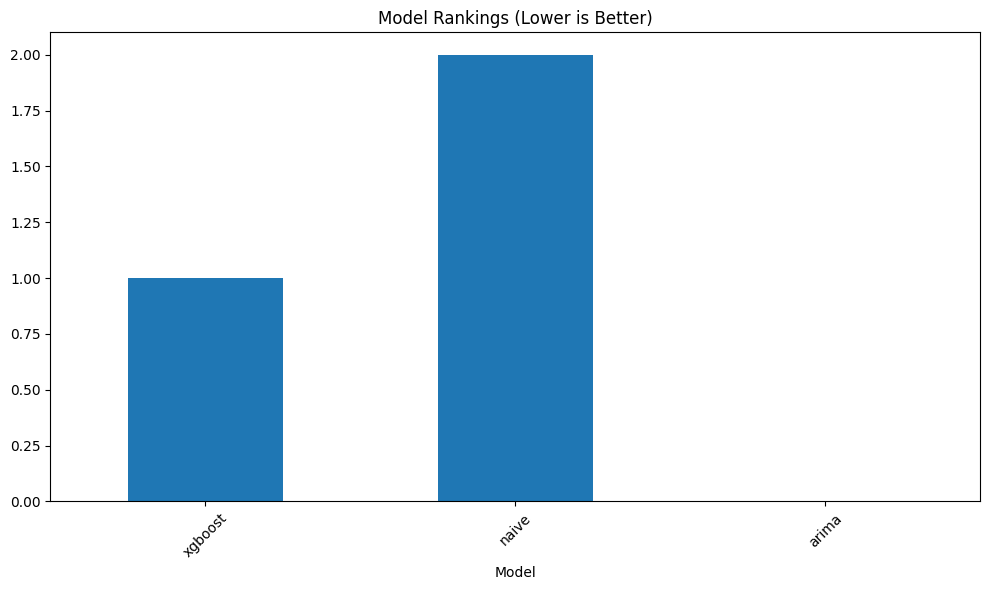


Model Performance Metrics:
             RMSE
Model            
naive    0.893190
arima         NaN
xgboost  0.534846


In [5]:
# Evaluate models
results = evaluate_all_models(test_ts, predictions)

print("\nModel Performance Metrics:")
print(results['metrics'])

## 4. Conclusions

Analysis of different models:

1. Overall Performance:
   - Compare performance metrics across different models
   - Identify the best performing model overall

2. Seasonal Impact:
   - How different models handle seasonal patterns
   - Which model works better for specific seasons

3. Model Specific Findings:
   - Strengths and weaknesses of each model
   - Stability of predictions

4. Recommendations:
   - Best model for production use
   - Trade-offs between different approaches
   - Suggestions for further improvements